<a href="https://colab.research.google.com/github/Julimarc07/Biose-ales_Juliana_Mart-nez/blob/main/Practica_6_Juliana_Martinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 6**

# ***4.1. Creación de la señal***

***Proponga una secuencia sinusoidal xe (n), con 0 ≤ n ≤ 1000, F0=0,01Hz y Fs=25Hz.***

In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import os
import pandas as pd
from scipy.signal import welch as pwelch

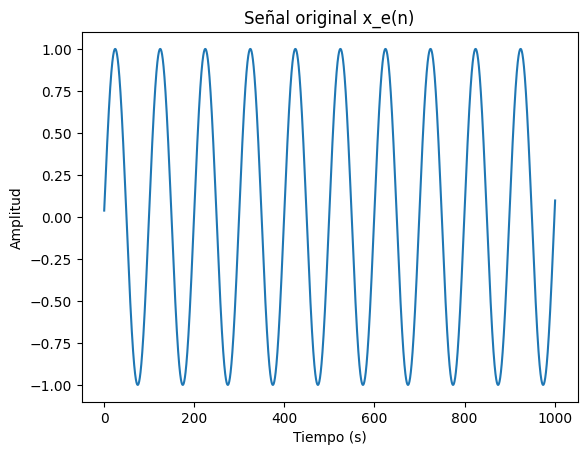

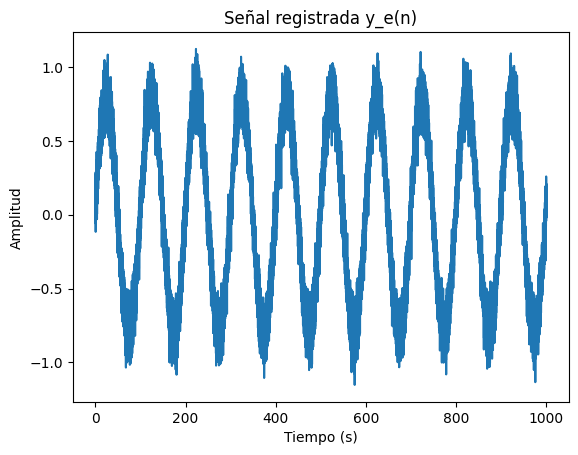

In [ ]:
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado inducido en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs)) #potencial con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retardo.

plt.figure()
plt.plot(n,x_e)
plt.title("Señal original x_e(n)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.show()

plt.figure()
plt.plot(n,y_e)
plt.title("Señal registrada y_e(n)")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.show()


# ***4.2. Diseño de un filtro***



 ***Diseñe un filtro FIR pasa bajas para la señal ye (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.***






Los filtros digitales de respuesta impulsional finita (Finite Impulse Response) se basan en obtener la salida a partir, exclusivamente, de las entradas actuales y anteriores. Ante un estímulo impulsional, la respuesta es finita lo que justifica su denominación, y su ventaja radica en que pueden diseñarse para que presenten fase lineal [1].

* ***¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s***

1. Argumento pass_zero

  El argumento pass_zero indica si el filtro permite el paso en la frecuencia cero o no

  * Pasa Banda (pass_zero='bandpass'): Indica que el filtro tiene una respuesta nula en la frecuencia cero y en las frecuencias altas fuera del rango, atenuando tanto las frecuencias bajas como las altas fuera del rango especificado.

  * Pasa Altas (pass_zero='highpass'): El filtro tiene una respuesta nula en la frecuencia cero, tal que atenúa las frecuencias bajas, permitiendo el paso solo a partir de la frecuencia de corte indicada.

2. Frecuencias de Corte (cutoff)

  * Para un filtro pasa banda, se tienen que especificar dos frecuencias de corte en forma de lista [low_cutoff, high_cutoff] para definir el rango en el que las frecuencias serán permitidas, y por fuera de él, serán rechazadas.

  * Para un filtro pasa altas, solo se especifica una única frecuencia de corte que indica la frecuencia mínima que se permitirá pasar, atenuando todas aquellas que estén por debajo a dicha frecuencia de corte.

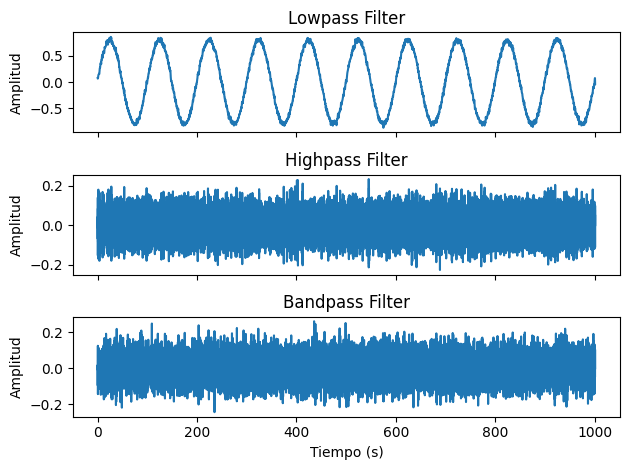

In [ ]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
low_cuttof = 1.25/nyquist  # Lower cutoff frequency
high_cuttof = 7.5/nyquist  # Upper cutoff frequency

#Implementación de filtros
highpass_fir = signal.firwin(order+1,high_cuttof, pass_zero = 'highpass',window='hamming')
lowpass_fir = signal.firwin(order+1,low_cuttof, pass_zero = 'lowpass',window='hamming')
bandpass_fir = signal.firwin(order+1,[low_cuttof,high_cuttof], pass_zero = 'bandpass',window='hamming')

y_l_fir = signal.filtfilt(b=lowpass_fir,a=1,x=y_e)
y_h_fir = signal.filtfilt(b=highpass_fir,a=1,x=y_e)
y_b_fir = signal.filtfilt(b=bandpass_fir,a=1,x=y_e)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.plot(n, y_l_fir)
ax1.set_ylabel("Amplitud")
ax1.set_title("Lowpass Filter")

ax2.plot(n, y_h_fir)
ax2.set_ylabel("Amplitud")
ax2.set_title("Highpass Filter")

ax3.plot(n, y_b_fir)
ax3.set_ylabel("Amplitud")
ax3.set_xlabel("Tiempo (s)")
ax3.set_title("Bandpass Filter")

plt.tight_layout()
plt.show()

***Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios***

Un filtro IIR es aquel que tiene una respuesta infinita al impulso y
que se caracterizan por tener una retroalimentación de la señal de salida.
En los filtros IIR, la salida es función no sólo de la entrada actual y
de las precedentes, sino también de las salidas anteriores. Es decir, se trata de filtros recursivos (poseen realimentación), y por tanto se espera que (en general) posean una respuesta impulsional infinita [2].

La principal ventaja de los filtros IIR frente a los filtros FIR es que suelen cumplir un conjunto determinado de especificaciones con un orden del filtro mucho menor que el de un filtro FIR equivalente [3].

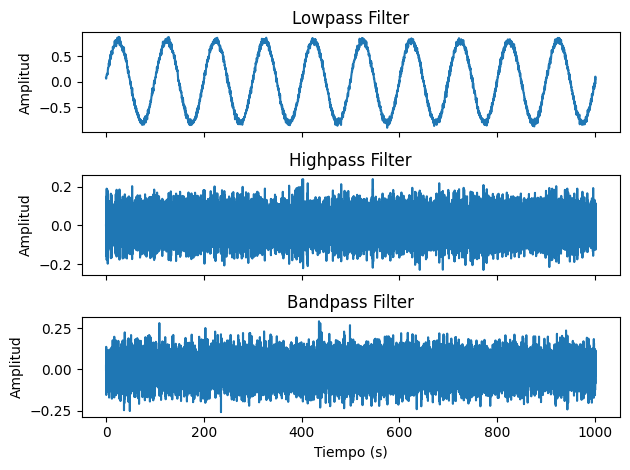

In [ ]:
Fs = 25 #frecuencia de muestreo
n = np.arange(0,1001,1/Fs) # tiempo
order = 10 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
low_cuttof = 1.25/nyquist  # Lower cutoff frequency
high_cuttof = 7.5/nyquist  # Upper cutoff frequency

lowpass_iir = signal.iirfilter(order+1, low_cuttof, btype='lowpass', analog=False)
highpass_iir = signal.iirfilter(order+1, high_cuttof, btype='highpass', analog=False)
bandpass_iir = signal.iirfilter(order+1, [low_cuttof, high_cuttof], btype='bandpass', analog=False)

# Filtros
y_f_iir = signal.filtfilt(b=lowpass_iir[0], a=lowpass_iir[1], x=y_e)
y_h_iir = signal.filtfilt(b=highpass_iir[0], a=highpass_iir[1], x=y_e)
y_b_iir = signal.filtfilt(b=bandpass_iir[0], a=bandpass_iir[1], x=y_e)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

#Graficación de filtros
ax1.plot(n, y_f_iir)
ax1.set_ylabel("Amplitud")
ax1.set_title("Lowpass Filter")

ax2.plot(n, y_h_iir)
ax2.set_ylabel("Amplitud")
ax2.set_title("Highpass Filter")

ax3.plot(n, y_b_iir)
ax3.set_ylabel("Amplitud")
ax3.set_xlabel("Tiempo (s)")
ax3.set_title("Bandpass Filter")

plt.tight_layout()
plt.show()

***Comparación entre los resultados usando IIR y FIR***

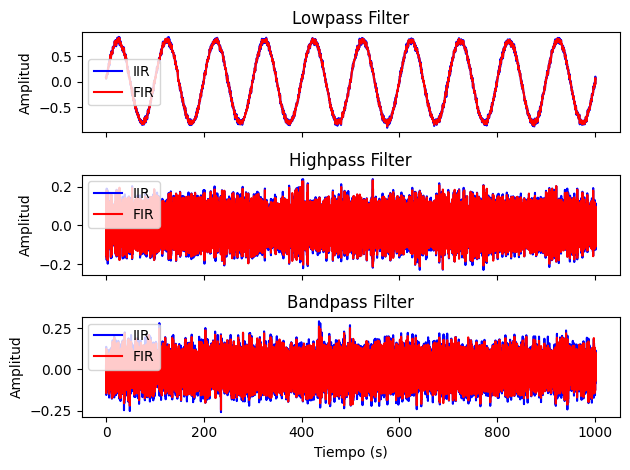

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

#Graficación de filtros
ax1.plot(n, y_f_iir, label= 'IIR', color="blue")
ax1.plot(n, y_l_fir, label= 'FIR', color="red")
ax1.set_ylabel("Amplitud")
ax1.set_title("Lowpass Filter")
ax1.legend()

ax2.plot(n, y_h_iir, label= 'IIR', color='blue')
ax2.plot(n, y_h_fir, label= 'FIR', color='red')
ax2.set_ylabel("Amplitud")
ax2.set_title("Highpass Filter")
ax2.legend()

ax3.plot(n, y_b_iir, label= 'IIR', color='blue')
ax3.plot(n, y_b_fir, label= 'FIR', color='red')
ax3.set_ylabel("Amplitud")
ax3.set_xlabel("Tiempo (s)")
ax3.set_title("Bandpass Filter")
ax3.legend()

plt.tight_layout()
plt.show()

**Análisis**

1. Filtro Pasabajas:

  Este filtro permite las frecuencias inferiores a la frecuencia de corte definida (1.25 Hz) y atenúa las frecuencias más altas. En la gráfica, se observa que la señal filtrada por el pasabajas tiene una forma de onda suave y oscilatoria gracias a la atenuación de las frecuencias altas, dejando solo los componentes de baja frecuencia de la señal original que permiten obtener como resultado dicha onda sinusoidal, que representa la componente de baja frecuencia dominante en la señal original.

2. Filtro Pasaaltas:

  Este filtro permite pasar solo las frecuencias por encima de la frecuencia de corte alta (7.5 Hz), eliminando las frecuencias bajas. En la gráfica se observa una señal más ruidosa, esto tiene su causa en que, las frecuencias bajas, que en este caso son las más significativas, se eliminan y solo quedan las de alta frecuencia, que en este caso, no tienen un componente significativo de la señal original.


3. Filtro Pasabanda:

  Este filtro permite pasar solo las frecuencias que se encuentran entre la frecuencia de corte baja (1.25 Hz) y la frecuencia de corte alta (7.5 Hz). En el gráfico se observa una mezcla de las frecuencias medias de la señal original. Se eliminan tanto las frecuencias bajas como las altas, dejando una señal que probablemente pueda ser menos ruidosa que la del filtro pasaaltas, pero que también tiene mucho menos detalle que la del filtro pasabajas.


  En general, no se observan diferencias para los filtros pasa bajas, pasa altas y pasa bandas encontrados mediante FIR e IIR, esto puede deberse a que la señal tiene una frecuencia fundamental baja (0.01), lo cual implica que las frecuencias presentes en la señal están muy por debajo de las frecuencias de corte definidas, lo que facilita que ambos filtros, a pesar de la diferencia en orden, puedan capturar la señal deseada de manera similar, ya que el contenido de frecuencia relevante cae dentro del rango de paso del filtro. Además, existe una buena relación SNR debido a la baja varianza del ruido (0.01), lo que hace que ambos filtros (FIR e IIR) logren un desempeño similar en la reducción del ruido sin grandes diferencias en la salida.

# ***4.3. Filtrado***

***Filtrado mediante *filtfilt* y *lfilter* usando filtro FIR***


/tmp/ipython-input-698188444.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


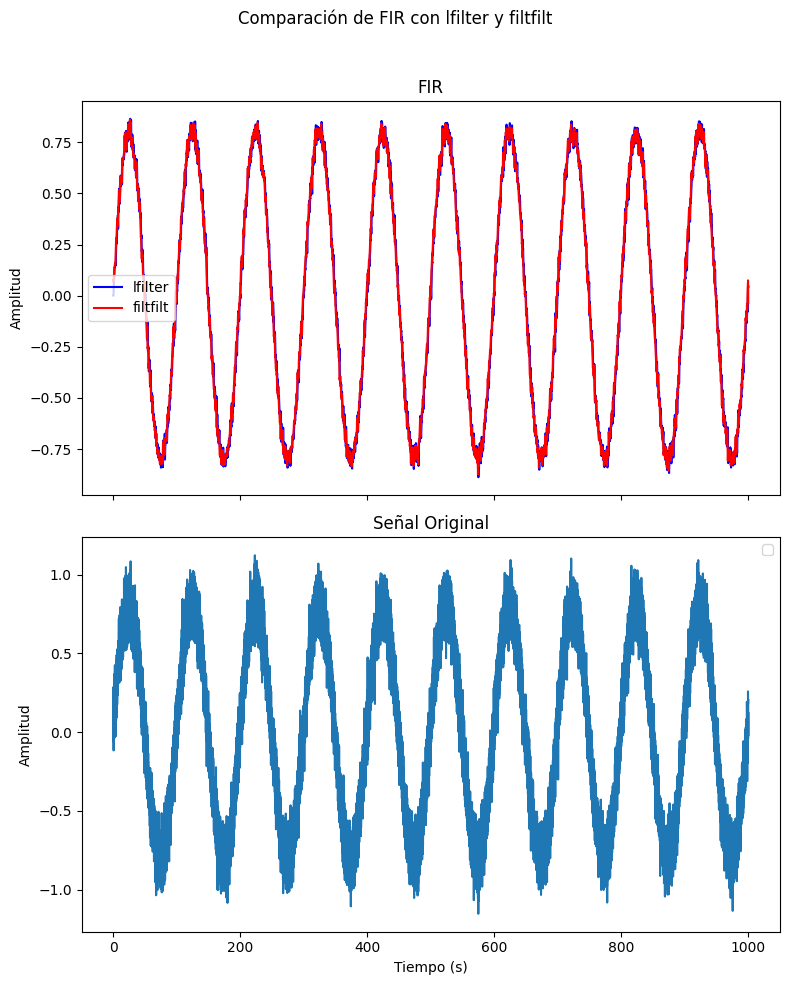

In [ ]:
# Aplicar filtro FIR con lfilter y filtfilt
y_fir_lfilter = signal.lfilter(b=lowpass_fir, a=1, x=y_e)
y_fir_filtfilt = signal.filtfilt(b=lowpass_fir, a=1, x=y_e)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
fig.suptitle("Comparación de FIR con lfilter y filtfilt")

# FIR con lfilter
axs[0].plot(n, y_fir_lfilter, label='lfilter',color="blue")
axs[0].plot(n, y_fir_filtfilt, label='filtfilt', color="red")
axs[0].set_title("FIR")
axs[0].set_ylabel("Amplitud")
axs[0].legend()

# Señal original para referencia
axs[1].plot(n, y_e)
axs[1].set_title("Señal Original")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1. ¿Por qué se utiliza solo el numerador?**

  En el caso de los filtros FIR, se utiliza solo el numerador porque estos filtros solo dependen de muestras pasadas de la señal de entrada y no tienen retroalimentación, lo que hace que su respuesta al impulso sea finita y completamente determinada por el numerador.

**2. ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia?**

  En general, se tiene que, la diferencia entre ambos métodos de filtrado radica en que filtfilt aplica el filtro en ambas direcciones para eliminar el desfase, mientras que lfilter aplica el filtro solo en una dirección, introduciendo un desfase en señales de alta frecuencia. En este caso, no se evidencian cambios en el uso de las funciones de filtrado para la señal evaluada, esto puede deberse a que la frecuencia fundamental de la señal (0.01 Hz) es tan baja que el desfase introducido es insignificante, y la señal filtrada parece idéntica en ambos casos. Además, con la frecuencia de corte de 1.25 Hz, la mayor parte del contenido de la señal pasa sin ser atenuado, ya que la frecuencia de la señal está muy por debajo de esta, lo que también conlleva a la obtención de resultados similares. Por otro lado, el ruido agregado tiene una varianza de 0.01, que es relativamente bajo en amplitud al ser comparado con la señal principal. Entonces, esta magnitud baja del ruido también influye en que la diferencia de los resultados obtenidos para lfilter y filtfilt no sea perceptible.

**3. ¿Es adecuado el orden del filtro usado?**

 El orden de un filtro FIR afecta directamente la pendiente de la banda de transición, un filtro de orden 30 se puede relacionar con una pendiente de corte más pronunciada. Esto puede ser adecuado para aplicaciones que necesitan atenuar eficazmente las frecuencias fuera de la banda de interés. Sin embargo, un orden alto también implica mayor complejidad computacional, lo que puede no ser necesario si no se requiere una atenuación tan estricta. Entonces, un orden de 30 parece adecuado para la frecuencia de corte de 1.25 Hz con una frecuencia de muestreo de 25 Hz. Es lo suficientemente alto como para proporcionar una atenuación adecuada de frecuencias fuera de la banda de interés, pero no tan alto como para añadir un costo computacional excesivo.

 Gráficamente no parece haber diferencias significativas entre lfilter y filtfilt, lo cual sugiere que el filtro está funcionando adecuadamente en términos de fase y atenuación de las frecuencias no deseadas. Esto es indicativo de que el orden del filtro es suficiente para cumplir con los objetivos de filtrado sin añadir distorsión notable.

***Filtrado mediante *filtfilt* y *lfilter* usando filtro IIR***

/tmp/ipython-input-32381588.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


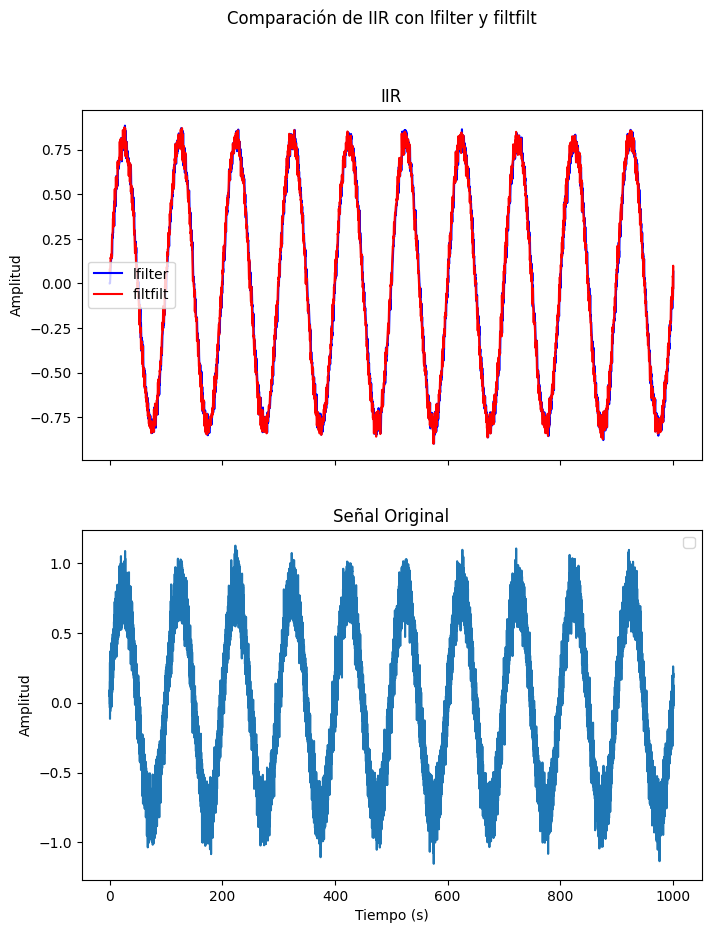

In [ ]:
# Aplicar filtro IIR con lfilter y filtfilt
y_iir_lfilter = signal.lfilter(b=lowpass_iir[0], a=lowpass_iir[1], x=y_e)
y_iir_filtfilt = signal.filtfilt(b=lowpass_iir[0], a=lowpass_iir[1], x=y_e)

fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)
fig.suptitle("Comparación de IIR con lfilter y filtfilt")

# IIR con lfilter
axs[0].plot(n, y_iir_lfilter, label='lfilter', color="blue")
axs[0].plot(n, y_iir_filtfilt, label='filtfilt', color="red")
axs[0].set_title("IIR")
axs[0].set_ylabel("Amplitud")
axs[0].legend()

# Señal original para referencia
axs[1].plot(n, y_e)
axs[1].set_title("Señal Original")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].legend()


plt.show()

En los filtros IIR se utilizan tanto el numerador como el denominador en la representación de la función de transferencia porque estos filtros tienen una respuesta recursiva. Esto significa que el valor actual de la señal filtrada depende no solo de las muestras actuales y pasadas de la señal de entrada, sino también de las muestras anteriores de la salida del filtro [3]. Gracias a esto, los filtros IIR logran una respuesta en frecuencia deseada con un orden más bajo en comparación con los filtros FIR.

El filtro IIR no pudo ser implementado con el mismo orden 30 que el filtro FIR debido a la naturaleza de los filtros IIR y cómo se comportan en comparación con los FIR.

Los filtros IIR, especialmente de órdenes altos, pueden volverse inestables, generando una respuesta en frecuencia que crece sin límites debido a la generación de polos cercanos al borde del círculo unitario en el plano Z, lo que lleva a una inestabilidad en la respuesta del filtro. Por otro lado, un orden alto en los filtros IIR también involucra una mayor acumulación de errores debido a la implicación de más coeficientes, amplificando frecuencias y generando valores muy grandes que llevan a la inestabilidad. Un orden menor, reduciría esta acumulación de errores, permitiendo una adecuada graficación. Por último, como los IIR también dependen del denominador, tienden a tener respuestas no solo inestables sino que también pueden tender a presentar fases no lineales. Por estas razones, se implementó un filtro IIR de orden 10.

# ***4.4 Aplicación***

In [ ]:
from google.colab import files
import numpy as np


uploaded = files.upload()
file_name = next(iter(uploaded))
señal = np.loadtxt(file_name)
señal_canal1 = señal[:, 0]

print(f"Número de muestras: {len(señal_canal1)}")


Saving senal_filtros.txt to senal_filtros.txt
Número de muestras: 60000


***Graficación de la señal original***

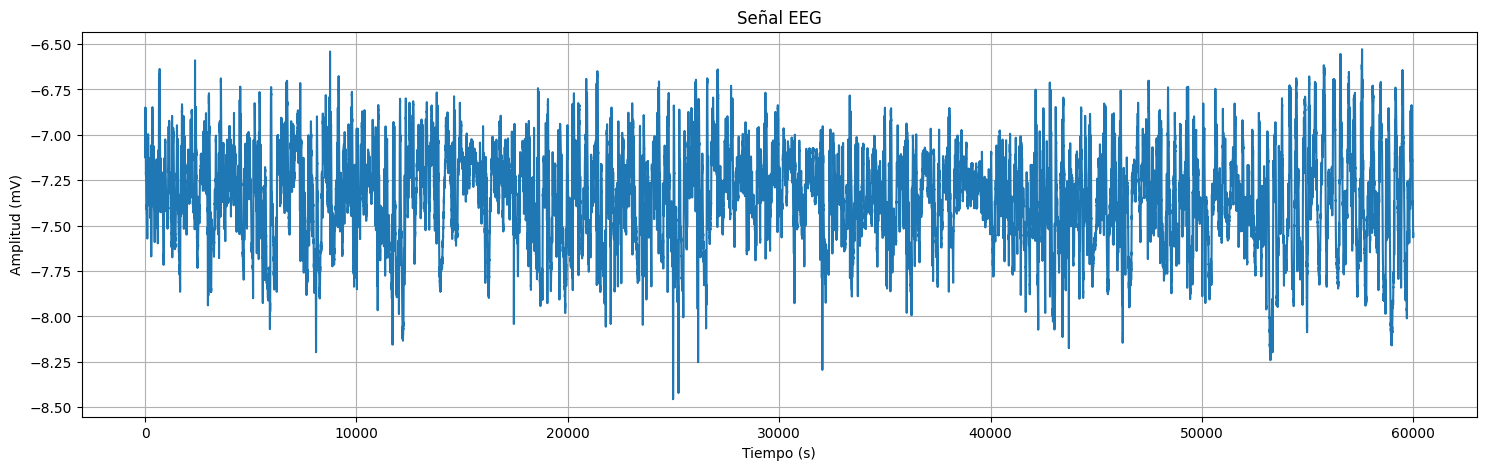

In [ ]:
fs = 500 #La frecuencia a la que fue adquerida la señal
plt.figure(figsize=(18, 5))
plt.plot(señal_canal1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (mV)')
plt.title('Señal EEG')
plt.grid(True)
plt.show()

•	***Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice.***

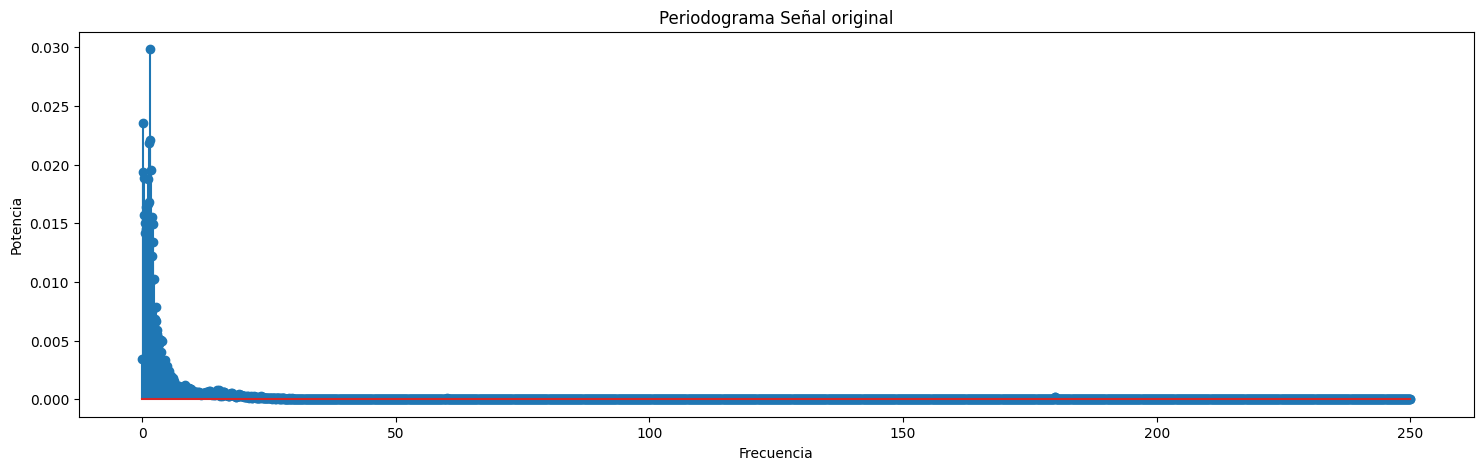

In [ ]:
nperseg =  5000 # ancho de la ventana
noverlap = int(nperseg / 2)
f, Pxx = pwelch(señal_canal1, fs, nperseg=nperseg, noverlap=noverlap, window='hann')
plt.figure(figsize=(18, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.title('Periodograma Señal original')
plt.show()

En el periodograma de Welch sin aumentar aparenta haber una influencia de señales a una frecuencia de 60Hz y también de 180Hz, para confirmar esto, se realiza un aumento de este gráfico:

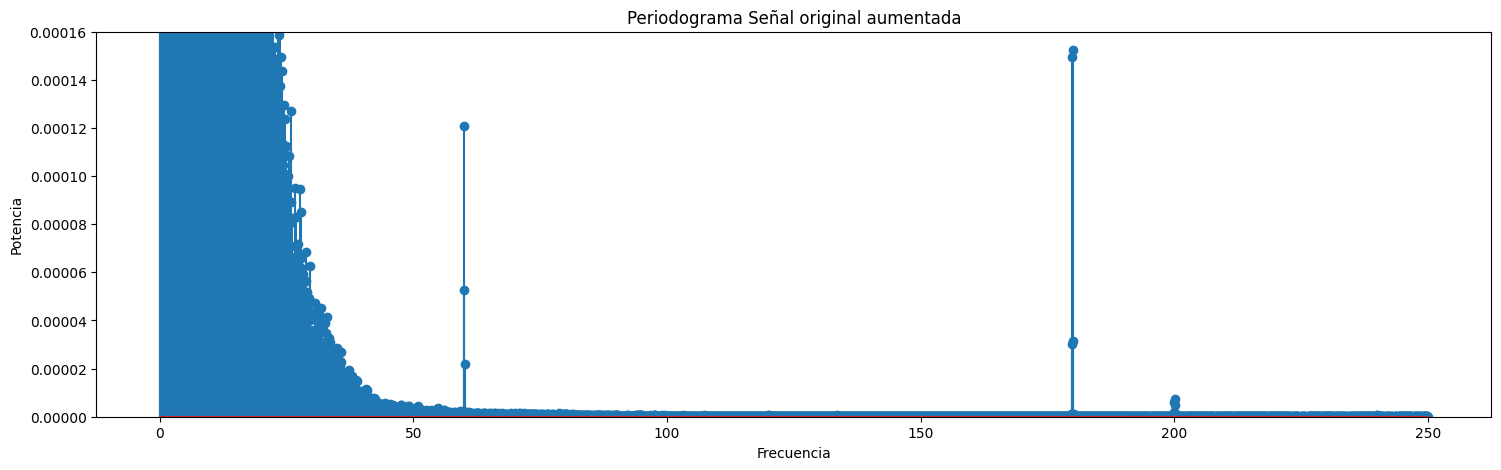

In [ ]:
plt.figure(figsize=(18, 5))
plt.stem(f, Pxx)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.title('Periodograma Señal original aumentada')
plt.ylim([0,0.00016])
plt.show()

Al aumentar el periodograma de Welch se evidencia más claramente la presencia de picos cerca de una frecuencia de 60 Hz, esto hace referencia al ruido caracteristico producido por la interferencia de la red electrica, el cual es común que aparezca al adquirir la señal y la distorsiona significativamente, afectando la precisión de los análisis [4]. Además de este, también se observa la influencia de otras frecuencias que no son de interés y aportan al ruido de la señal, encontradas a 180Hz y 200Hz. Por esto, se toma la decisión de realizar un filtrado pasabajas a 50Hz permitiendo la optimización del análisis de la señal EEG centralizandolo en las frecuencias que proporcionan información significativa de la señal a analizar (señales EEG se encuentran en el rango de 1-60 Hz), facilitando la identificación de patrones y anomalías que son cruciales para la evaluación clínica [5]

•	***Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.***

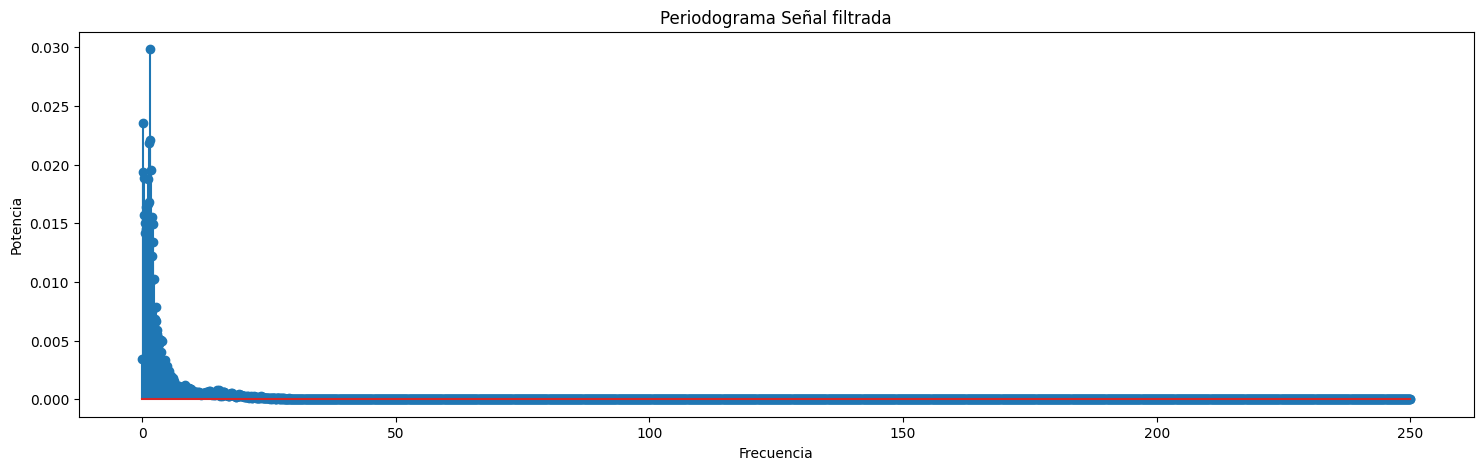

In [ ]:
order = int(3.3/0.1) # orden calculado segun requerimientos (50/500 = 0.1 )
nyquist = fs/2 # frecuencia de nyquist
wn = 50/nyquist
lowpass_fir_señal = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming')

señal_filtrada = signal.filtfilt(b=lowpass_fir_señal,a=1,x=señal_canal1)

nperseg =  5000 # ancho de la ventana
noverlap = int(nperseg / 2)
f_filtrada, Pxx_filtrada = pwelch(señal_filtrada, fs, nperseg=nperseg, noverlap=noverlap, window='hann')
plt.figure(figsize=(18, 5))
plt.stem(f_filtrada, Pxx_filtrada)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.title('Periodograma Señal filtrada')
#plt.xlim([0, 65])
plt.show()

Ahora, luego de la aplicación del filtro pasabajas, el periodograma evidencia que ya no hay influencia de ninguna frecuencia superior a los 50Hz. Sin embargo, se vuelve a implementar el aumento del periodograma de la señal filtrada para comprobarlo con mayor claridad.

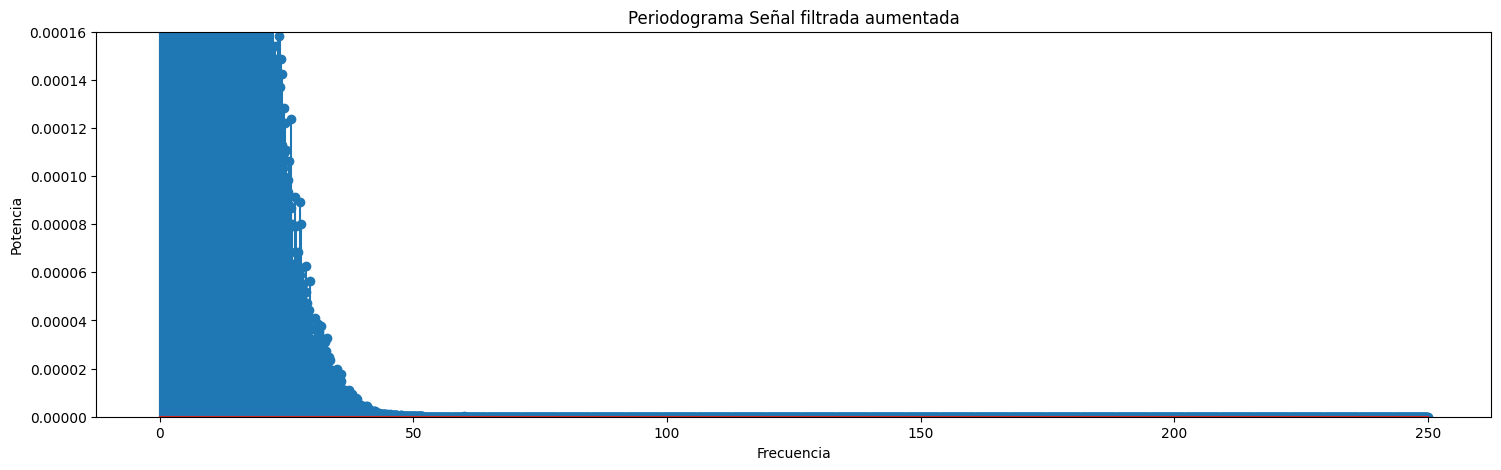

In [ ]:
plt.figure(figsize=(18, 5))
plt.stem(f_filtrada, Pxx_filtrada)
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.title('Periodograma Señal filtrada aumentada')
plt.ylim([0,0.00016])
plt.show()

Una vez realizado el filtrado, se evidencia la atenuación de todas las señales superiores a 50Hz, a causa del filtro pasa bajas implementado.

•	***Grafique un segmento de las señales antes y después de filtrar, analice los cambios.***

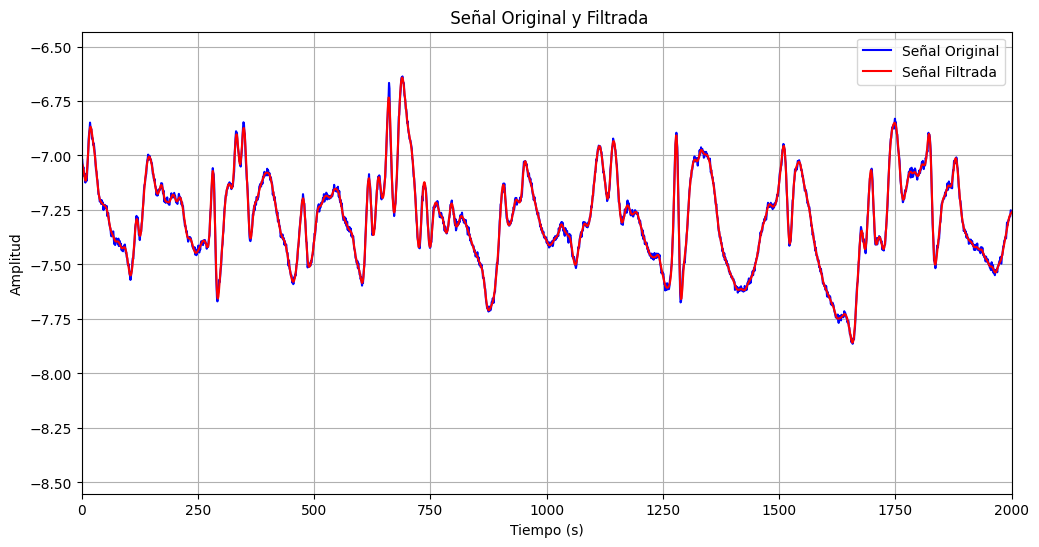

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(señal_canal1, label='Señal Original', color="blue")
plt.plot(señal_filtrada, label='Señal Filtrada', color="red")
plt.title(' Señal Original y Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.xlim([0,2000])
plt.legend()
plt.grid(True)
plt.show()

El gráfico del segmento de las señales antes y después de filtrar evidencia la integridad general de la forma de onda de la señal, además de una correcta alineación de los picos y valles, esto indica que el filtro aplicado no eliminó información de interés de la señal EEG. Además, la señal filtrada evidencia menos variaciones rápidas, lo que indica la reducción de las fluctuaciones de alta frecuencia asociadas al ruido, indicativo que las interferencias disminuyeron.

# ***Conclusiones***

*   Los filtros FIR y IIR demostraron ser herramientas eficaces para la reducción de ruido en señales EEG. A pesar de sus diferencias estructurales, ambos lograron resultados comparables en términos de atenuación de ruido, especialmente en señales de baja frecuencia.

*   La aplicación de filtros pasabajos resultó una opción viable para reducir el ruido de alta frecuencia que se encontraba en la señal EEG (ruido causado por la red eléctrica y otras frecuencias indeseadas). Al implementar un filtro pasabajos con una frecuencia de corte de 50 Hz, se eliminan estas interferencias, lo cual permite mejorar la claridad de la señal y optimizar su análisis.

* La mejora en la calidad de la señal EEG después del filtrado facilita tareas como la detección de eventos neuronales, análisis de patrones cerebrales y diagnósticos médicos, lo cual demuestra el valor de los filtros digitales como herramientas esenciales en el procesamiento de señales biomédicas.


# ***Referencias***

[1] Diseño de Filtros FIR. (s.f.). Universidad de Valencia. Escuela Técnica Superior de Ingeniería. http://ocw.uv.es/ingenieria-y-arquitectura/filtros-digitales/tema_3._diseno_de_filtros_fir.pdf

[2] Fundamentos Teóricos. (s.f.). Test Page for the HTTP Server on Red Hat Enterprise Linux. https://biblus.us.es/bibing/proyectos/abreproy/11375/fichero/MEMORIA%2FFundamentos+teoricos.pdf

[3] Diseño de filtros IIR- MATLAB & Simulink- MathWorks América Latina. (s.f.). MathWorks - Creador de MATLAB y Simulink - MATLAB y Simulink - MATLAB & Simulink. https://la.mathworks.com/help/signal/ug/iir-filter-design.html

[4] Bendat, J. S., & Piersol, A. G. (2011). Random Data: Analysis and Measurement Procedures (4th ed.). Wiley-Interscience.
Este libro ofrece una cobertura amplia sobre técnicas de análisis de datos aleatorios, incluyendo métodos de estimación de espectros.

[5] Torres-García, A. (2013, abril). Análisis de señales electroencefalográficas para la clasificación de habla imaginada. Scielo. https://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0188-95322013000100002#:~:text=Por%20ejemplo,%20las%20frecuencias%20del,,%20128,%20ó%20256).
